In [3]:
# 🔹 Import libraries
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings (like Colab)
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid", palette="pastel")

# 🔹 Connect to SQL Server
conn = pyodbc.connect(
    r'DRIVER={SQL Server};'
    r'SERVER=ASUSVIVOBOOK16X\SQLEXPRESS;'
    r'DATABASE=banking_case;'
    r'Trusted_Connection=yes;'
)

# 🔹 Load data (replace table name!)
query = "SELECT * FROM dbo.Customer;"
df = pd.read_sql(query, conn)

# Preview dataset
df.head()


C:\Users\vshks\AppData\Local\Temp\ipykernel_15084\3609942143.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,Client_ID,Name,Age,Location_ID,Joined_Bank,Banking_Contact,Nationality,Occupation,Fee_Structure,Loyalty_Classification,Estimated_Income,Superannuation_Savings,Amount_of_Credit_Cards,Credit_Card_Balance,Bank_Loans,Bank_Deposits,Checking_Accounts,Saving_Accounts,Foreign_Currency_Account,Business_Lending,Properties_Owned,Risk_Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,75384.773438,17677.949219,1,484.540009,7.762429e+05,1.485829e+06,6.036179e+05,607332.437500,12249.959961,1.134475e+06,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,289834.312500,17398.919922,1,2256.879883,1.270615e+06,6.414828e+05,2.295214e+05,344635.156250,61162.308594,2.000526e+06,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,169935.234375,42825.898438,2,4568.740234,1.052716e+06,1.033402e+06,6.526747e+05,203054.343750,79071.781250,5.481376e+05,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,356808.125000,5473.149902,2,4205.000000,1.211951e+05,1.048158e+06,1.048158e+06,234685.015625,57513.648438,1.148402e+06,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,130711.679688,48077.601562,1,3779.489990,1.048302e+06,4.877825e+05,4.466442e+05,128351.453125,30012.140625,1.674412e+06,0,3,1,2,5


In [4]:
# Check the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Get a concise summary of the DataFrame
print("\nDataFrame Info:")
df.info()

Shape of the DataFrame: (3000, 25)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client_ID                 3000 non-null   object 
 1   Name                      3000 non-null   object 
 2   Age                       3000 non-null   int64  
 3   Location_ID               3000 non-null   int64  
 4   Joined_Bank               3000 non-null   object 
 5   Banking_Contact           3000 non-null   object 
 6   Nationality               3000 non-null   object 
 7   Occupation                3000 non-null   object 
 8   Fee_Structure             3000 non-null   object 
 9   Loyalty_Classification    3000 non-null   object 
 10  Estimated_Income          3000 non-null   float64
 11  Superannuation_Savings    3000 non-null   float64
 12  Amount_of_Credit_Cards    3000 non-null   int64  
 13  Credit_Card

In [7]:
# Define income band boundaries
bins = [0, 100000, 300000, float('inf')]
labels = ['Low', 'Mid', 'High']

# Use the correct column name
df['Income Band'] = pd.cut(df['Estimated_Income'], bins=bins, labels=labels, include_lowest=True)

# Preview
df[['Estimated_Income']]


,Estimated_Income
0,75384.773438
1,289834.312500
2,169935.234375
3,356808.125000
4,130711.679688
...,...
2995,297617.125000
2996,42397.460938
2997,48339.878906
2998,107265.867188


In [9]:
# Define income band boundaries
bins = [0, 100000, 300000, float('inf')]
labels = ['Low', 'Mid', 'High']

# Create the 'Income Band' column using pd.cut
df['Income Band'] = pd.cut(df['Estimated_Income'], bins=bins, labels=labels, include_lowest=True)

In [14]:
categorical_cols = [
    "Risk_Weighting",
    "Nationality",
    "Occupation",
    "Fee_Structure",
    "Loyalty_Classification",
    "Properties_Owned",
    "Income Band"  
]

for col in categorical_cols:
    print(f"\nValue Counts for '{col}':")
    display(df[col].value_counts())



Value Counts for 'Risk_Weighting':


Risk_Weighting
2    1222
1     836
3     460
4     322
5     160
Name: count, dtype: int64


Value Counts for 'Nationality':


Nationality
European      1309
Asian          754
American       507
Australian     254
African        176
Name: count, dtype: int64


Value Counts for 'Occupation':


Occupation
Associate Professor             28
Structural Analysis Engineer    28
Recruiter                       25
Account Coordinator             24
Human Resources Manager         24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: count, Length: 195, dtype: int64


Value Counts for 'Fee_Structure':


Fee_Structure
High    1476
Mid      962
Low      562
Name: count, dtype: int64


Value Counts for 'Loyalty_Classification':


Loyalty_Classification
Jade        1331
Silver       767
Gold         585
Platinum     317
Name: count, dtype: int64


Value Counts for 'Properties_Owned':


Properties_Owned
2    777
1    776
3    742
0    705
Name: count, dtype: int64


Value Counts for 'Income Band':


Income Band
Mid     1517
Low     1027
High     456
Name: count, dtype: int64

In [15]:
# Generate descriptive statistics for numerical columns
print("\nDescriptive Statistics for Numerical Columns:")
display(df.describe())


Descriptive Statistics for Numerical Columns:


,Age,Location_ID,Estimated_Income,Superannuation_Savings,Amount_of_Credit_Cards,Credit_Card_Balance,Bank_Loans,Bank_Deposits,Checking_Accounts,Saving_Accounts,Foreign_Currency_Account,Business_Lending,Properties_Owned,Risk_Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,171305.034184,25531.599685,1.463667,3176.206944,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529998,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
std,19.854760,12462.273017,111935.808180,16259.950768,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924033,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242
min,17.000000,12.000000,15919.480469,1482.030029,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,82906.597656,12513.774902,1.000000,1236.630005,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542236,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,142313.476562,22357.355469,1.000000,2560.804932,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190430,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,242290.300781,35464.741211,2.000000,4522.632690,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.391602,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,522330.250000,75963.898438,3.000000,13991.990234,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.867188,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000


In [16]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 Client_ID                   0
Name                        0
Age                         0
Location_ID                 0
Joined_Bank                 0
Banking_Contact             0
Nationality                 0
Occupation                  0
Fee_Structure               0
Loyalty_Classification      0
Estimated_Income            0
Superannuation_Savings      0
Amount_of_Credit_Cards      0
Credit_Card_Balance         0
Bank_Loans                  0
Bank_Deposits               0
Checking_Accounts           0
Saving_Accounts             0
Foreign_Currency_Account    0
Business_Lending            0
Properties_Owned            0
Risk_Weighting              0
BRId                        0
GenderId                    0
IAId                        0
Income Band                 0
dtype: int64


In [19]:
df['Joined_Bank'] = pd.to_datetime(df['Joined_Bank'], format='%Y-%m-%d')
print(df['Joined_Bank'].dtype)


datetime64[ns]


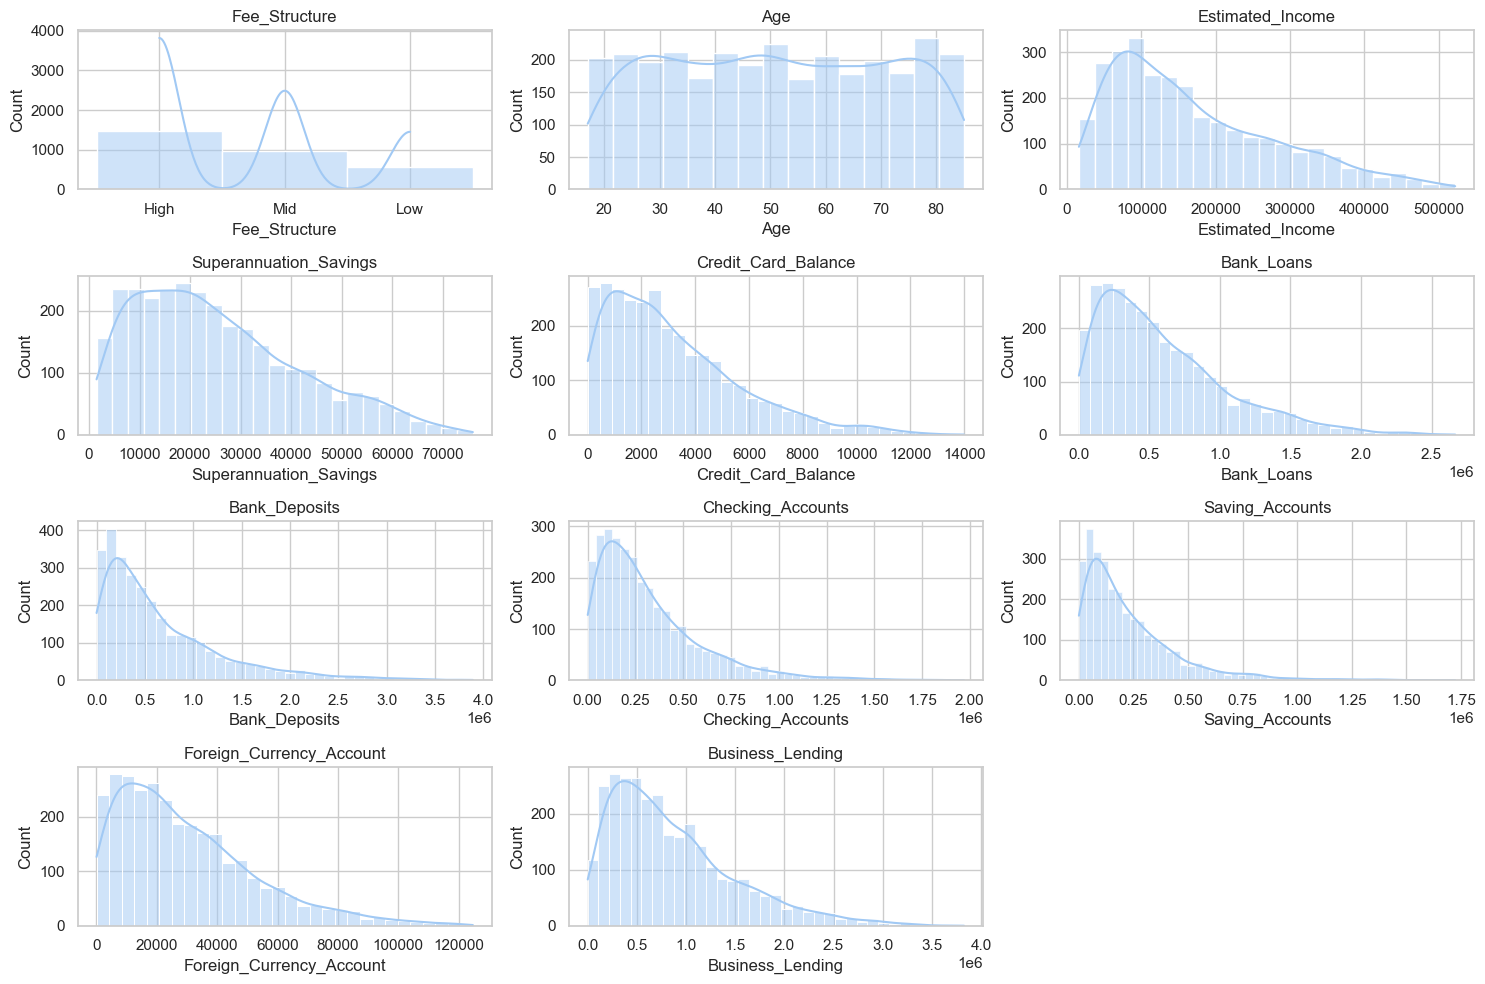

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical analysis and exploration
numerical_cols = ['Fee_Structure','Age', 'Estimated_Income', 'Superannuation_Savings', 'Credit_Card_Balance', 'Bank_Loans', 'Bank_Deposits', 'Checking_Accounts', 'Saving_Accounts', 'Foreign_Currency_Account', 'Business_Lending']

# Univariate analysis and visualization
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()



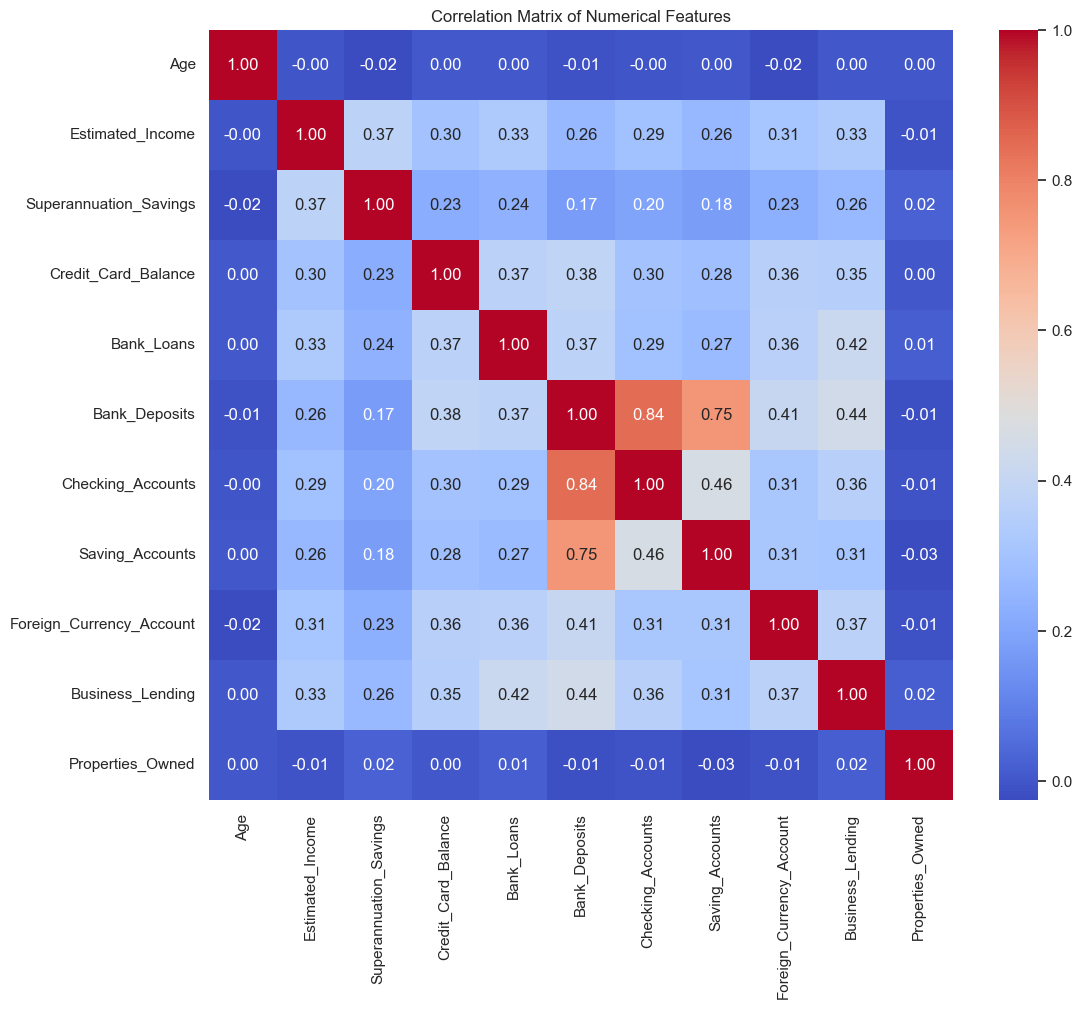

In [21]:

# Select numerical columns for correlation analysis
numerical_cols = ['Age', 'Estimated_Income', 'Superannuation_Savings', 'Credit_Card_Balance',
                  'Bank_Loans', 'Bank_Deposits', 'Checking_Accounts', 'Saving_Accounts',
                  'Foreign_Currency_Account', 'Business_Lending', 'Properties_Owned']

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

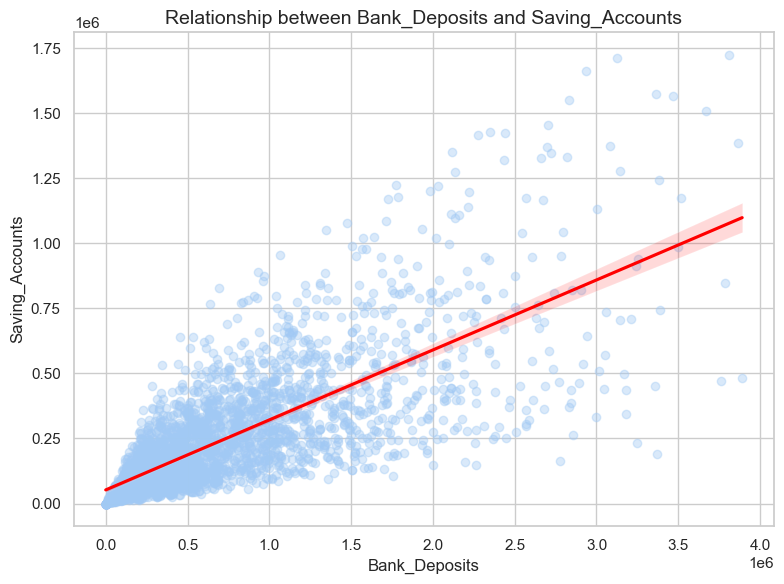

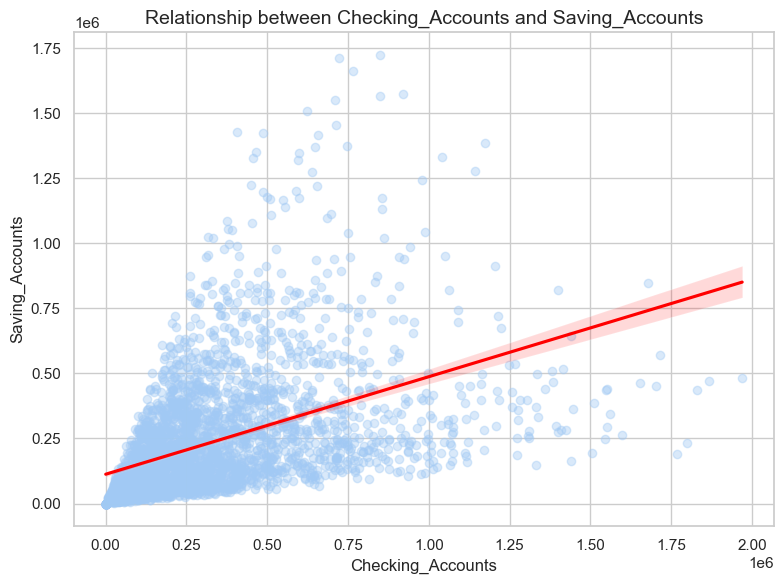

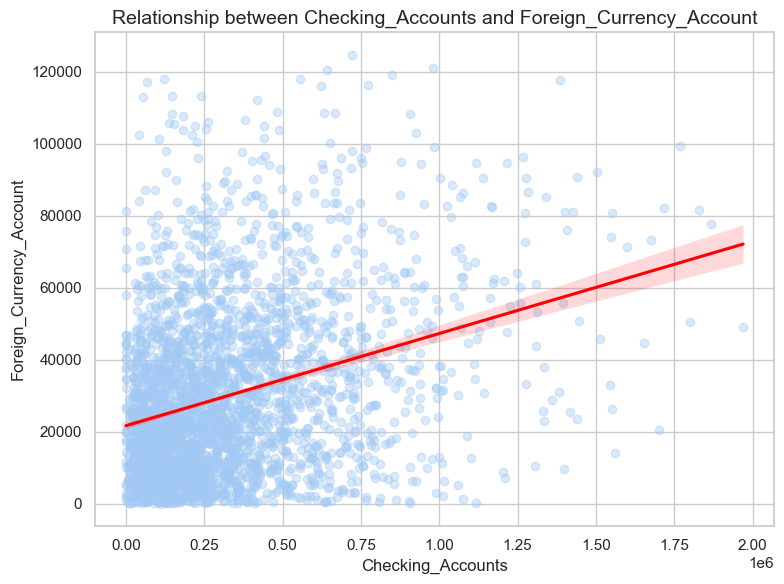

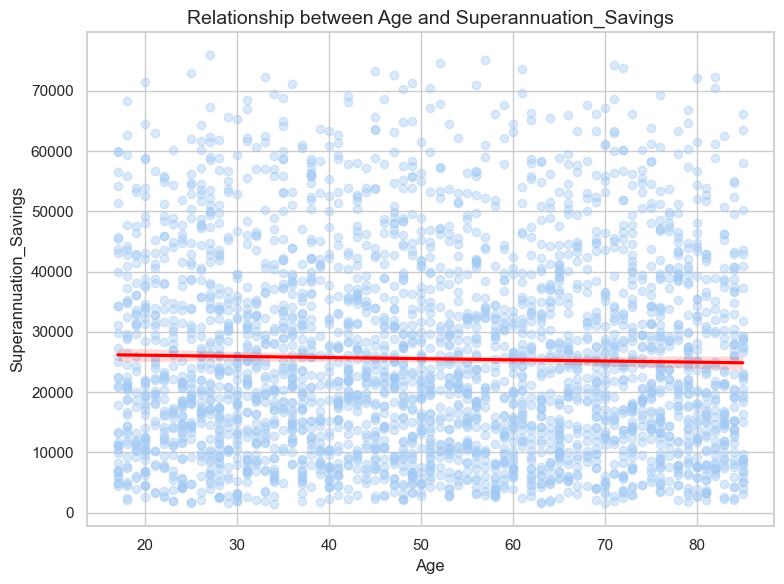

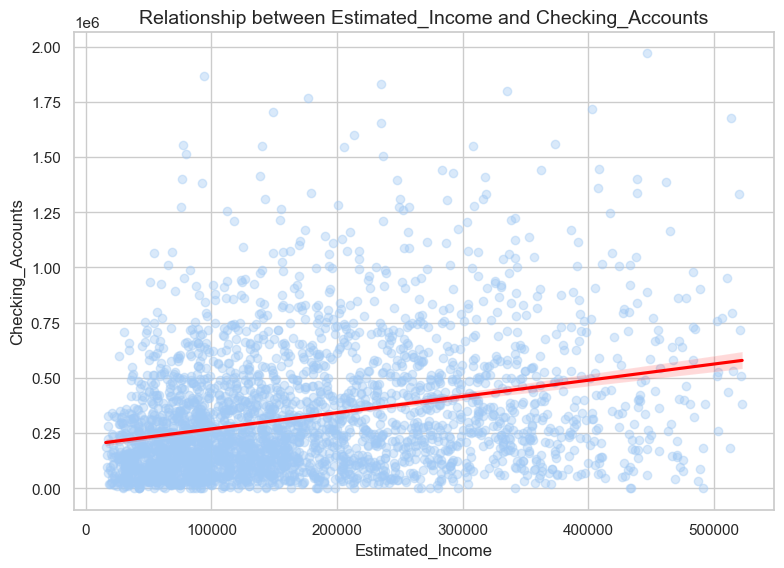

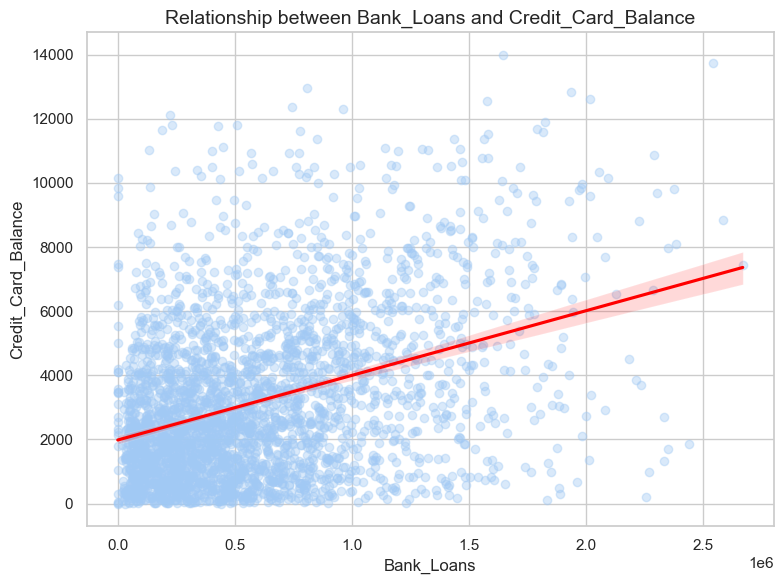

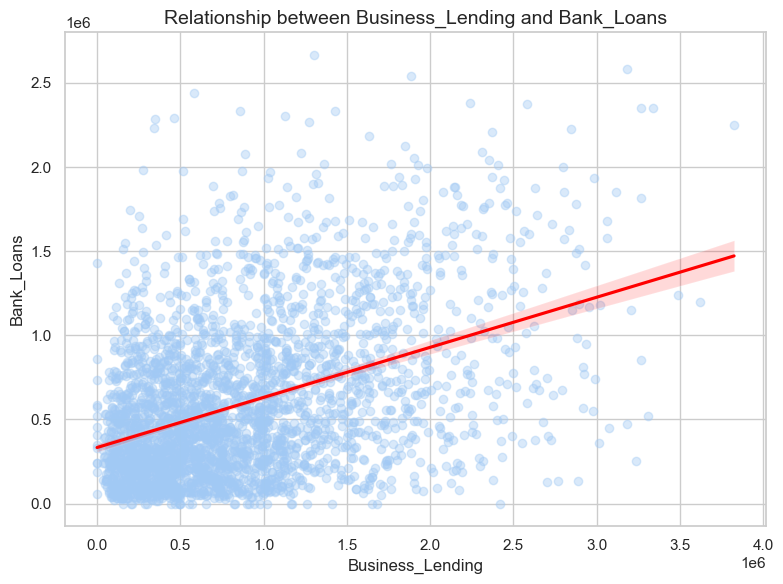

In [22]:
pairs_to_plot = [
    ('Bank_Deposits', 'Saving_Accounts'),
    ('Checking_Accounts', 'Saving_Accounts'),
    ('Checking_Accounts', 'Foreign_Currency_Account'),
    ('Age', 'Superannuation_Savings'),
    ('Estimated_Income', 'Checking_Accounts'),
    ('Bank_Loans', 'Credit_Card_Balance'),
    ('Business_Lending', 'Bank_Loans'),
]


for x_col, y_col in pairs_to_plot:
    plt.figure(figsize=(8, 6))
    sns.regplot(
        data=df,
        x=x_col,
        y=y_col,
        scatter_kws={'alpha': 0.4},     # semi-transparent points
        line_kws={'color': 'red'}       # best-fit line color
    )
    plt.title(f'Relationship between {x_col} and {y_col}', fontsize=14)
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel(y_col, fontsize=12)
    plt.tight_layout()
    plt.show()

📊 Key Insights from Correlation Analysis
1. Deposits and Savings Behavior

Strong correlation between Bank Deposits and Saving Accounts highlights overlapping financial behavior.

Customers who actively deposit funds also tend to grow or maintain higher savings balances, suggesting a linked saving-deposit pattern.

2. Income, Age, and Accumulation

Estimated Income and Age show moderate correlations with Superannuation, Savings, and Checking balances.

This reflects a financial lifecycle effect: higher earners and older customers often accumulate more retirement savings, maintain larger balances, and may carry higher loan or credit exposures.

3. Low Correlation with Property Ownership

Properties Owned shows weak correlations with balances or deposits.

This indicates that property ownership is likely influenced by external factors (real estate markets, location, inheritance, etc.) rather than the bank’s internal financial metrics.

4. Business vs. Personal Banking

Business Lending has a moderate link with Bank Loans, suggesting some overlap (customers using both personal and business credit).

However, its weak relationship with deposits and property-related metrics suggests business lending serves a distinct customer segment.